# **<font color=brown > Deepak_Kishore_Tanuku_Mini_Project_1**

**<font color=brown > IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings('ignore')

**<font color=brown > Reading the Data**

In [2]:
sales_df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')

In [3]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**<font color=brown > Copying DataFrame for Visualization**

In [4]:
viz_df = sales_df.copy()

**<font color=brown > Checking for Null values**

In [5]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

* There is 40 % of Null data in the Item_Outlet_Sales Column.
* So we have to impute the Null values with any Appropriate Feature.

**<font color=brown > Checking DataTypes of Columns**

In [6]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<b> Imputing Null Values <b>
* Imputing Null Values with Mean Values
* For Imputing of Data i am Considering Two Features: Item_Type and Outlet_Identifier
* Imputing the Values by taking the Mean of the Data with Respective combinations of Item_Type and Outlet_Identifier

**<font color=brown > Converting the Object to Categorical**

In [7]:
new_df = sales_df.select_dtypes('object')
for i in new_df.columns:
    sales_df[i]=sales_df[i].astype('category')

**<font color=brown > Converting Categorical to Numerical**

In [8]:
new_df = sales_df.select_dtypes('category')
for i in new_df.columns:
    sales_df[i]=LabelEncoder().fit_transform(sales_df[i])

**<font color=brown > Scaling of Data**

In [9]:
for i in sales_df.columns:
     sales_df[i]=MinMaxScaler().fit_transform(sales_df[i].to_numpy().reshape(-1,1))

**<font color=brown > Taking Column Names**

In [10]:
cols = sales_df.columns

**<font color=brown > Imputing Values using Iterative Imputer**

In [11]:
impute = IterativeImputer(estimator=LinearRegression(), random_state=45).fit(sales_df)
sales_df = pd.DataFrame(impute.transform(sales_df))

**<font color=brown > Assigning Column Names to DataFrame**

In [12]:
sales_df.columns = cols

**<font color=brown > Head ()**

In [13]:
sales_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.182945
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.228345
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.130279
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.229092
14203,0.639923,0.294433,1.0,0.311393,0.200000,0.205884,0.777778,0.708333,1.0,0.5,0.333333,0.084536


**<font color=brown > Adding the Column to Visualization DataFrame**

In [14]:
viz_df['Item_Outlet_Sales']=sales_df['Item_Outlet_Sales']

**<font color=brown > Column Datatypes**

In [15]:
sales_df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

**<font color=brown > Summary**

In [16]:
sales_df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,0.500766,0.490526,0.353351,0.205427,0.481958,0.465686,0.524719,0.534612,0.694241,0.556428,0.400427,0.164603
std,0.288588,0.276970,0.478027,0.149688,0.280898,0.263529,0.315233,0.348819,0.337738,0.406378,0.265514,0.116882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.090538
25%,0.250963,0.247395,0.000000,0.091032,0.266667,0.266224,0.222222,0.083333,0.500000,0.000000,0.333333,0.075436
50%,0.501926,0.479012,0.000000,0.180940,0.400000,0.470958,0.555556,0.583333,0.500000,0.500000,0.333333,0.147404
75%,0.750321,0.726109,1.000000,0.278504,0.666667,0.656055,0.777778,0.791667,1.000000,1.000000,0.333333,0.231660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**<font color=brown > Null Values**

In [17]:
sales_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### **<font color=brown > EDA (Exploratory Data Analysis)**

### **<font color=brown > Univariate Analysis**

**<font color=brown ><b> Analysis of Distribution of Item Visibility <b>**

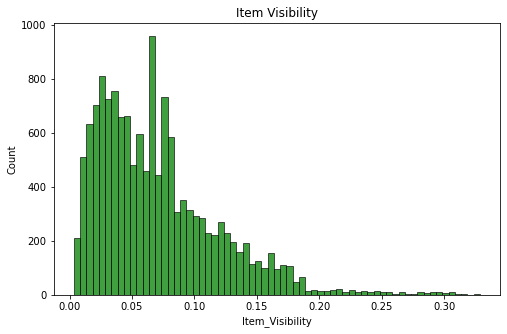

In [18]:
plt.figure(figsize=(8,5))
sb.histplot(viz_df['Item_Visibility'],color='green')
plt.title('Item Visibility')
plt.show()

* Most of the Products have Item Visibility between 0.0 to 0.08.

**<font color=brown ><b> Analysis of Distribution of Sales <b>**

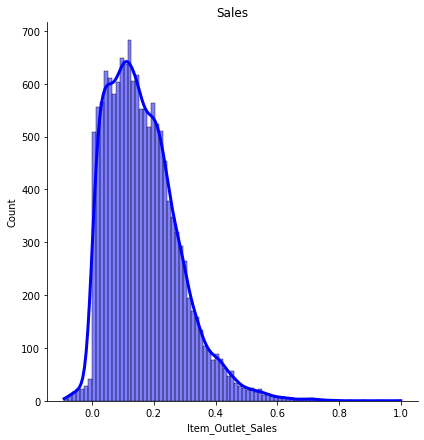

In [19]:
sb.displot(viz_df['Item_Outlet_Sales'],kde=True,height=6,color='blue',line_kws={"color":"black",'lw':'3'})
plt.title('Sales')
plt.show()

* Sales Distribution high between 0 and 4000. Product having high sales are decreasing after 4000.

**<font color=brown ><b> Analysis of Distribution of Item Weight <b>**

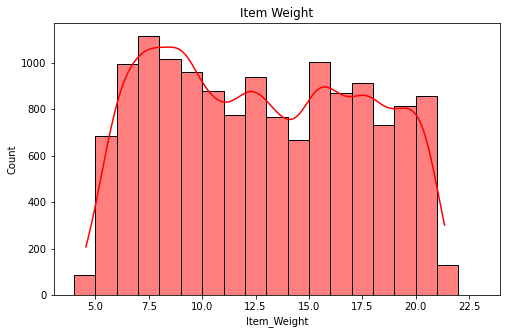

In [20]:
plt.figure(figsize=(8,5))
sb.histplot(viz_df['Item_Weight'],bins=np.arange(4,24,1),kde=True,color='red')
plt.title('Item Weight')
plt.show()

* Items weight of All products are Equally Distributed over every weight.

**<font color=brown ><b> Analysis of Outlet Type Number of Sales <b>**

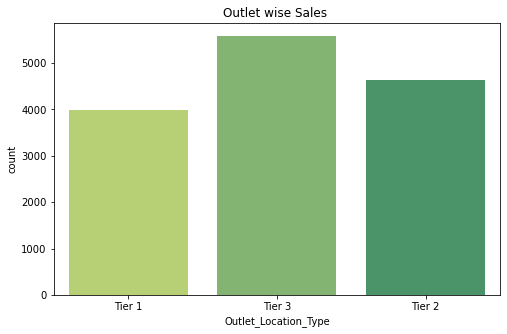

In [21]:
plt.figure(figsize=(8,5))
sb.countplot(viz_df['Outlet_Location_Type'],palette='summer_r')
plt.title('Outlet wise Sales ')
plt.show()

* Outlet Type of Tier 3 has Highest number of Sales and Tier 1 has the Least.

**<font color=brown ><b> Analysis of Fat content wise Number of Sales <b>**

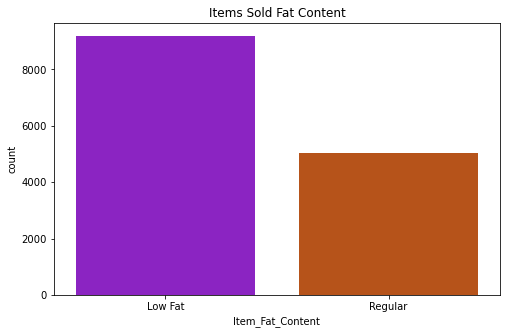

In [22]:
plt.figure(figsize=(8,5))
sb.countplot(viz_df['Item_Fat_Content'],palette='gnuplot')
plt.title('Items Sold Fat Content')
plt.show()

* Products having low Fat Content has more number of Sales compared to Regular Type products.

### **<font color=brown >Bi Variate Analysis**

**<font color=brown ><b> Analysis between Item MRP and Item Sales <b>**

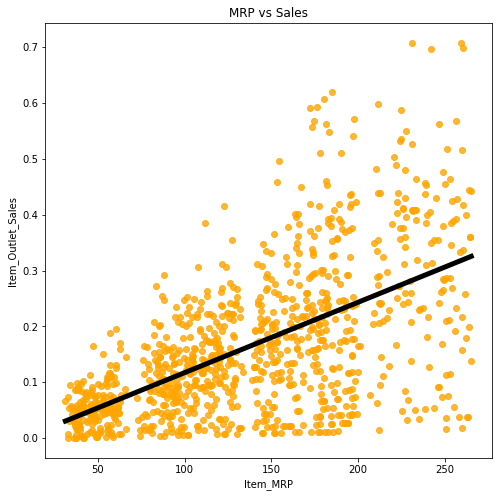

In [23]:
plt.figure(figsize=(8,8))
sb.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=viz_df[:1000],ci=0,line_kws={"color":"black",'lw':'5'},color='orange')
plt.title('MRP vs Sales')
plt.show()

* On analysing between the MRP and Sales of Product. I have identified there is a positive trend.
* So we can say that on Increasing of MRP there is Increase of Sales.
* But Items with Low MRP has more number of Sales.

**<font color=brown ><b> Comparing Features with Sales Feature. <b>**

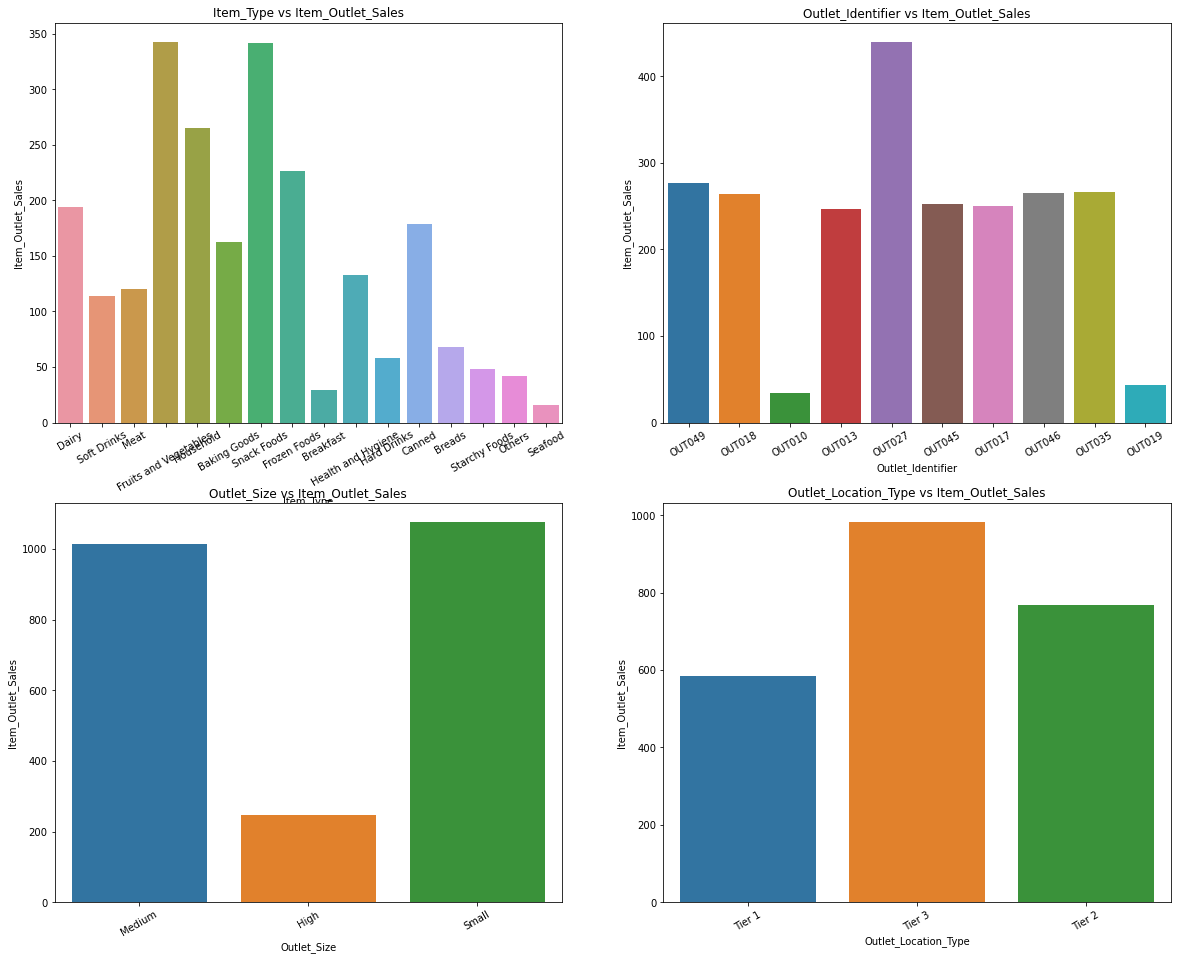

In [24]:
cols = ['Item_Type','Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type']

plt.figure(figsize=(20,25))
for i in enumerate(cols):
    plt.subplot(3,2,i[0]+1)
    sb.barplot(y='Item_Outlet_Sales',x=i[1],ci=0,estimator=sum,data=viz_df)
    plt.xticks(rotation=30)
    plt.title(i[1]+' vs Item_Outlet_Sales')

* Fruits - Vegetables and Snack Foods has high amount of Sales where as Seafood has least Amount of Sales.
* Outlet which has highest amount of sales is OUT027 and Least amount of Sales is OUT010.
* Based on the Outlet size small size Outlet has more amount of Sales compared to All whereas High size Outlet has least amount of Sales.
* Based on the Location Type Tier 1 has the least amount of Sales whereas Tier 3 has least amount of Sales.

**<font color=brown > Columns**

In [25]:
sales_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**<font color=brown > Columns Dtypes**

In [26]:
sales_df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

**<font color=brown > Checking for Correlation**

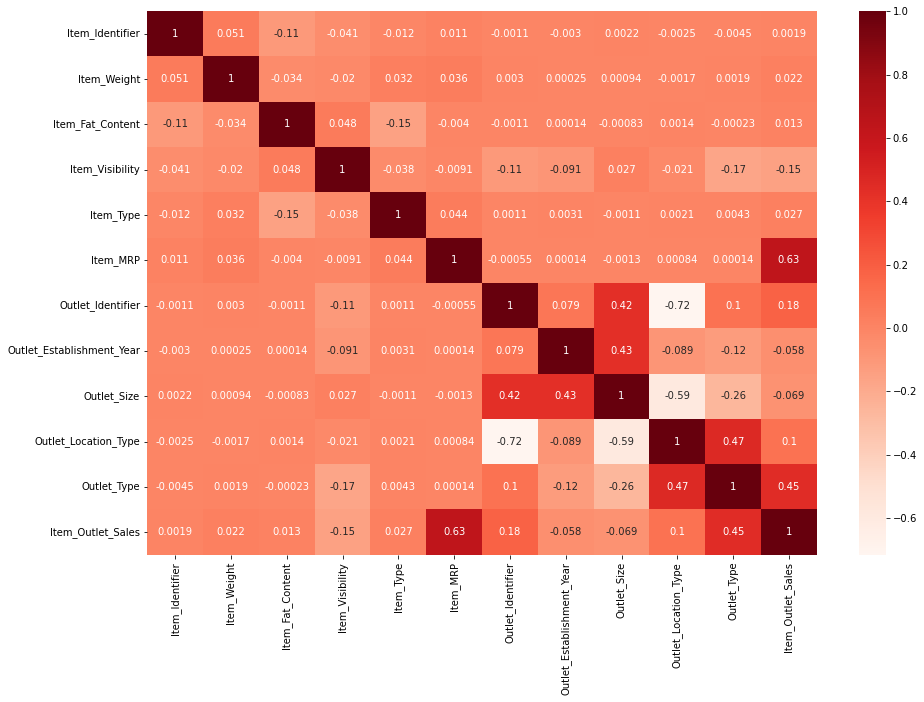

In [27]:
plt.figure(figsize=(15,10))
sb.heatmap(sales_df.corr(),annot=True,cmap='Reds')
plt.show()

**<font color=brown > Spliiting the Data**

In [28]:
x = sales_df[['Item_Visibility','Item_MRP','Outlet_Type','Outlet_Identifier']]
y = sales_df['Item_Outlet_Sales']

**<font color=brown > Dimensionality Reduction using PCA**

In [29]:
x = PCA(n_components=2).fit_transform(x)
x[:5]

array([[-0.45150234,  0.44302381],
       [ 0.09776531, -0.35842674],
       [-0.45146936, -0.0139463 ],
       [ 0.61284096,  0.15030084],
       [ 0.41304724, -0.3624774 ]])

**<font color=brown > Train Test Split**

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=32)

**<font color=brown > Shape of Data**

In [31]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11363, 2) (2841, 2) (11363,) (2841,)


### **<font color=brown ><b> Linear Regression <b>**

**<font color=brown > Model Building**

In [32]:
model_1 = LinearRegression().fit(x_train,y_train)

**<font color=brown > Coeffiecient of Determination Train Data**

In [33]:
model_1_score = round(model_1.score(x_train,y_train),4)
print('Performance of Model on Train Data: ',model_1_score)

Performance of Model on Train Data:  0.5247


**<font color=brown > Coeffiecient of Determination Test Data**

In [34]:
model_1_score_test = round(model_1.score(x_test,y_test),4)
print('Performance of Model on Test Data: ',model_1_score_test)

Performance of Model on Test Data:  0.5185


**<font color=brown > Intercept**

In [35]:
model_1.intercept_

0.16478022624503746

**<font color=brown > Slope**

In [36]:
model_1.coef_

array([-0.10132784,  0.29566108])

**<font color=brown > Predicting the Data**

In [37]:
pred_1 = model_1.predict(x_test)

**<font color=brown > Checking for ERRORS**

**<font color=brown > Defining User Defined Function for Errors**

In [38]:
def errors(pred):
    mse = mean_squared_error(y_test,pred)
    rmse =  mean_squared_error(y_test,pred,squared=False)
    mae = mean_absolute_error(y_test,pred)
    mape = mean_absolute_percentage_error(y_test,pred)
    return(mse,rmse,mae,mape)

In [39]:
mse_1,rmse_1,mae_1,mape_1 = errors(pred_1)

print('Mean Squared Error: ',mse_1)
print('Root Mean Squared Error: ',rmse_1)
print('Mean Absolute Error: ',mae_1)
print('Mean Absolute Percentage Error: ',mape_1)

Mean Squared Error:  0.00680922744825623
Root Mean Squared Error:  0.08251804316788075
Mean Absolute Error:  0.057414809040539534
Mean Absolute Percentage Error:  62089205607.23738


**<font color=brown > Cross Validation**

In [40]:
cv_model_1 = LinearRegression()

kf = KFold(n_splits=5,shuffle=True,random_state=55)

cv_model_1_r2 = cross_val_score(cv_model_1,x,y,cv=kf,n_jobs=-1,scoring='r2',error_score='raise').mean()
cv_model_1_mse = -cross_val_score(cv_model_1,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error',error_score='raise').mean()
cv_model_1_rmse = np.sqrt(-cross_val_score(cv_model_1,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error',error_score='raise').mean())
cv_model_1_mae = -cross_val_score(cv_model_1,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_absolute_error',error_score='raise').mean()
cv_model_1_mape = -cross_val_score(cv_model_1,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_absolute_percentage_error',error_score='raise').mean()

**<font color=brown > Visualization using Predicted and Actual Values**

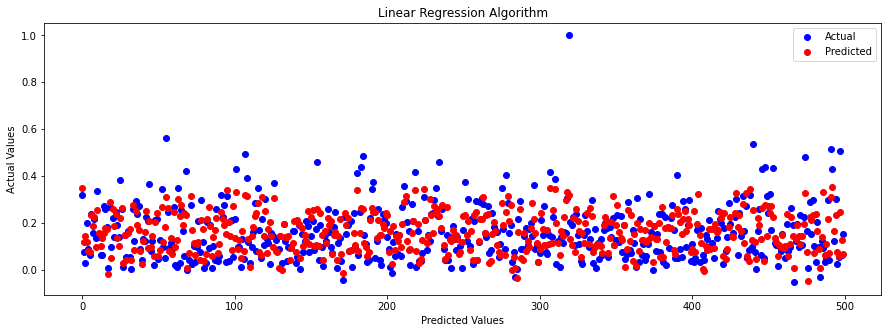

In [41]:
plt.figure(figsize=(15,5))
X = np.arange(0,len(y_test[:500]))
plt.scatter(X,y_test[:500],color='blue',label='Actual')
plt.scatter(X,pred_1[:500],color='red',label='Predicted')
plt.title('Linear Regression Algorithm')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

* Performance of Model on Train Data and Test Data are similar. So we can say that model is good.

### **<font color=brown ><b> Decision Tree Regressor<b>**

**<font color=brown > Hyper Parameter Tuning**

In [42]:
parameters={
        'max_depth':np.arange(2,10,1),
        'min_samples_split':np.arange(5,15,1),
        'min_samples_leaf' : np.arange(2,14,1)
        }

**<font color=brown > Grid Search**

In [43]:
model_2 = DecisionTreeRegressor()
kf = KFold(n_splits=5,shuffle=True,random_state=55)

GS = GridSearchCV(estimator=model_2,cv=kf,param_grid=parameters,n_jobs=-1,scoring='neg_root_mean_squared_error')

**<font color=brown > Fitting Data**

In [44]:
GS.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=55, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='neg_root_mean_squared_error')

**<font color=brown > Find best Parameters**

In [45]:
GS.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=9, min_samples_split=5)

**<font color=brown > Model Building**

In [46]:
model_2 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=9, min_samples_split=5).fit(x_train,y_train)

**<font color=brown > Coefficient of Determination for Train Data**

In [47]:
model_2_score=round(model_2.score(x_train,y_train),4)
print('Performance of Model on Train Data: ',model_2_score)

Performance of Model on Train Data:  0.6759


**<font color=brown > Coefficient of Determination for Test Data**

In [48]:
model_2_score_test = round(model_2.score(x_test,y_test),4)
print('Performance of Model on Test Data: ',model_2_score_test)

Performance of Model on Test Data:  0.6506


**<font color=brown > Predicting the Data**

In [49]:
pred_2 = model_2.predict(x_test)

**<font color=brown > Checking for ERRORS**

In [50]:
mse_2,rmse_2,mae_2,mape_2 = errors(pred_2)

print('Mean Squared Error: ',mse_2)
print('Root Mean Squared Error: ',rmse_2)
print('Mean Absolute Error: ',mae_2)
print('Mean Absolute Percentage Error: ',mape_2)

Mean Squared Error:  0.004941480127958438
Root Mean Squared Error:  0.07029566222718467
Mean Absolute Error:  0.04616228119230037
Mean Absolute Percentage Error:  42569613158.899124


**<font color=brown > Cross Validation**

In [51]:
cv_model_2 = DecisionTreeRegressor()

kf = KFold(n_splits=5,shuffle=True,random_state=55)

cv_model_2_r2 = cross_val_score(cv_model_2,x,y,cv=kf,n_jobs=-1,scoring='r2',error_score='raise').mean()
cv_model_2_mse = -cross_val_score(cv_model_2,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error',error_score='raise').mean()
cv_model_2_rmse = np.sqrt(-cross_val_score(cv_model_2,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error',error_score='raise').mean())
cv_model_2_mae = -cross_val_score(cv_model_2,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_absolute_error',error_score='raise').mean()
cv_model_2_mape = -cross_val_score(cv_model_2,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_absolute_percentage_error',error_score='raise').mean()

**<font color=brown > Visualization using Predicted and Actual Values**

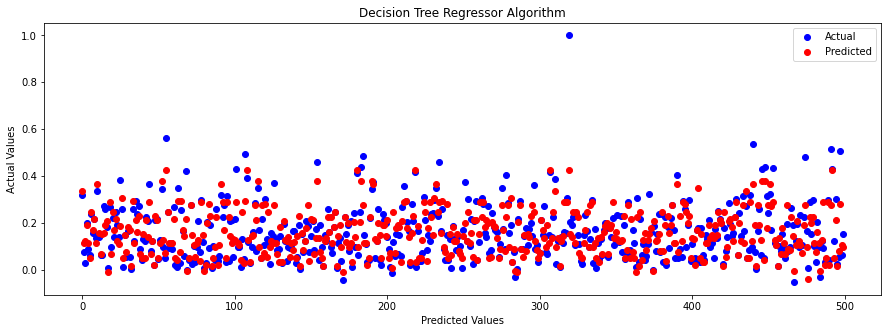

In [52]:
plt.figure(figsize=(15,5))
X = np.arange(0,len(y_test[:500]))
plt.scatter(X,y_test[:500],color='blue',label='Actual')
plt.scatter(X,pred_2[:500],color='red',label='Predicted')
plt.title('Decision Tree Regressor Algorithm')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

* Performance of Model on Train Data and Test Data are similar. So we can say that model is good.

**<font color=brown > Plotting the Tree**

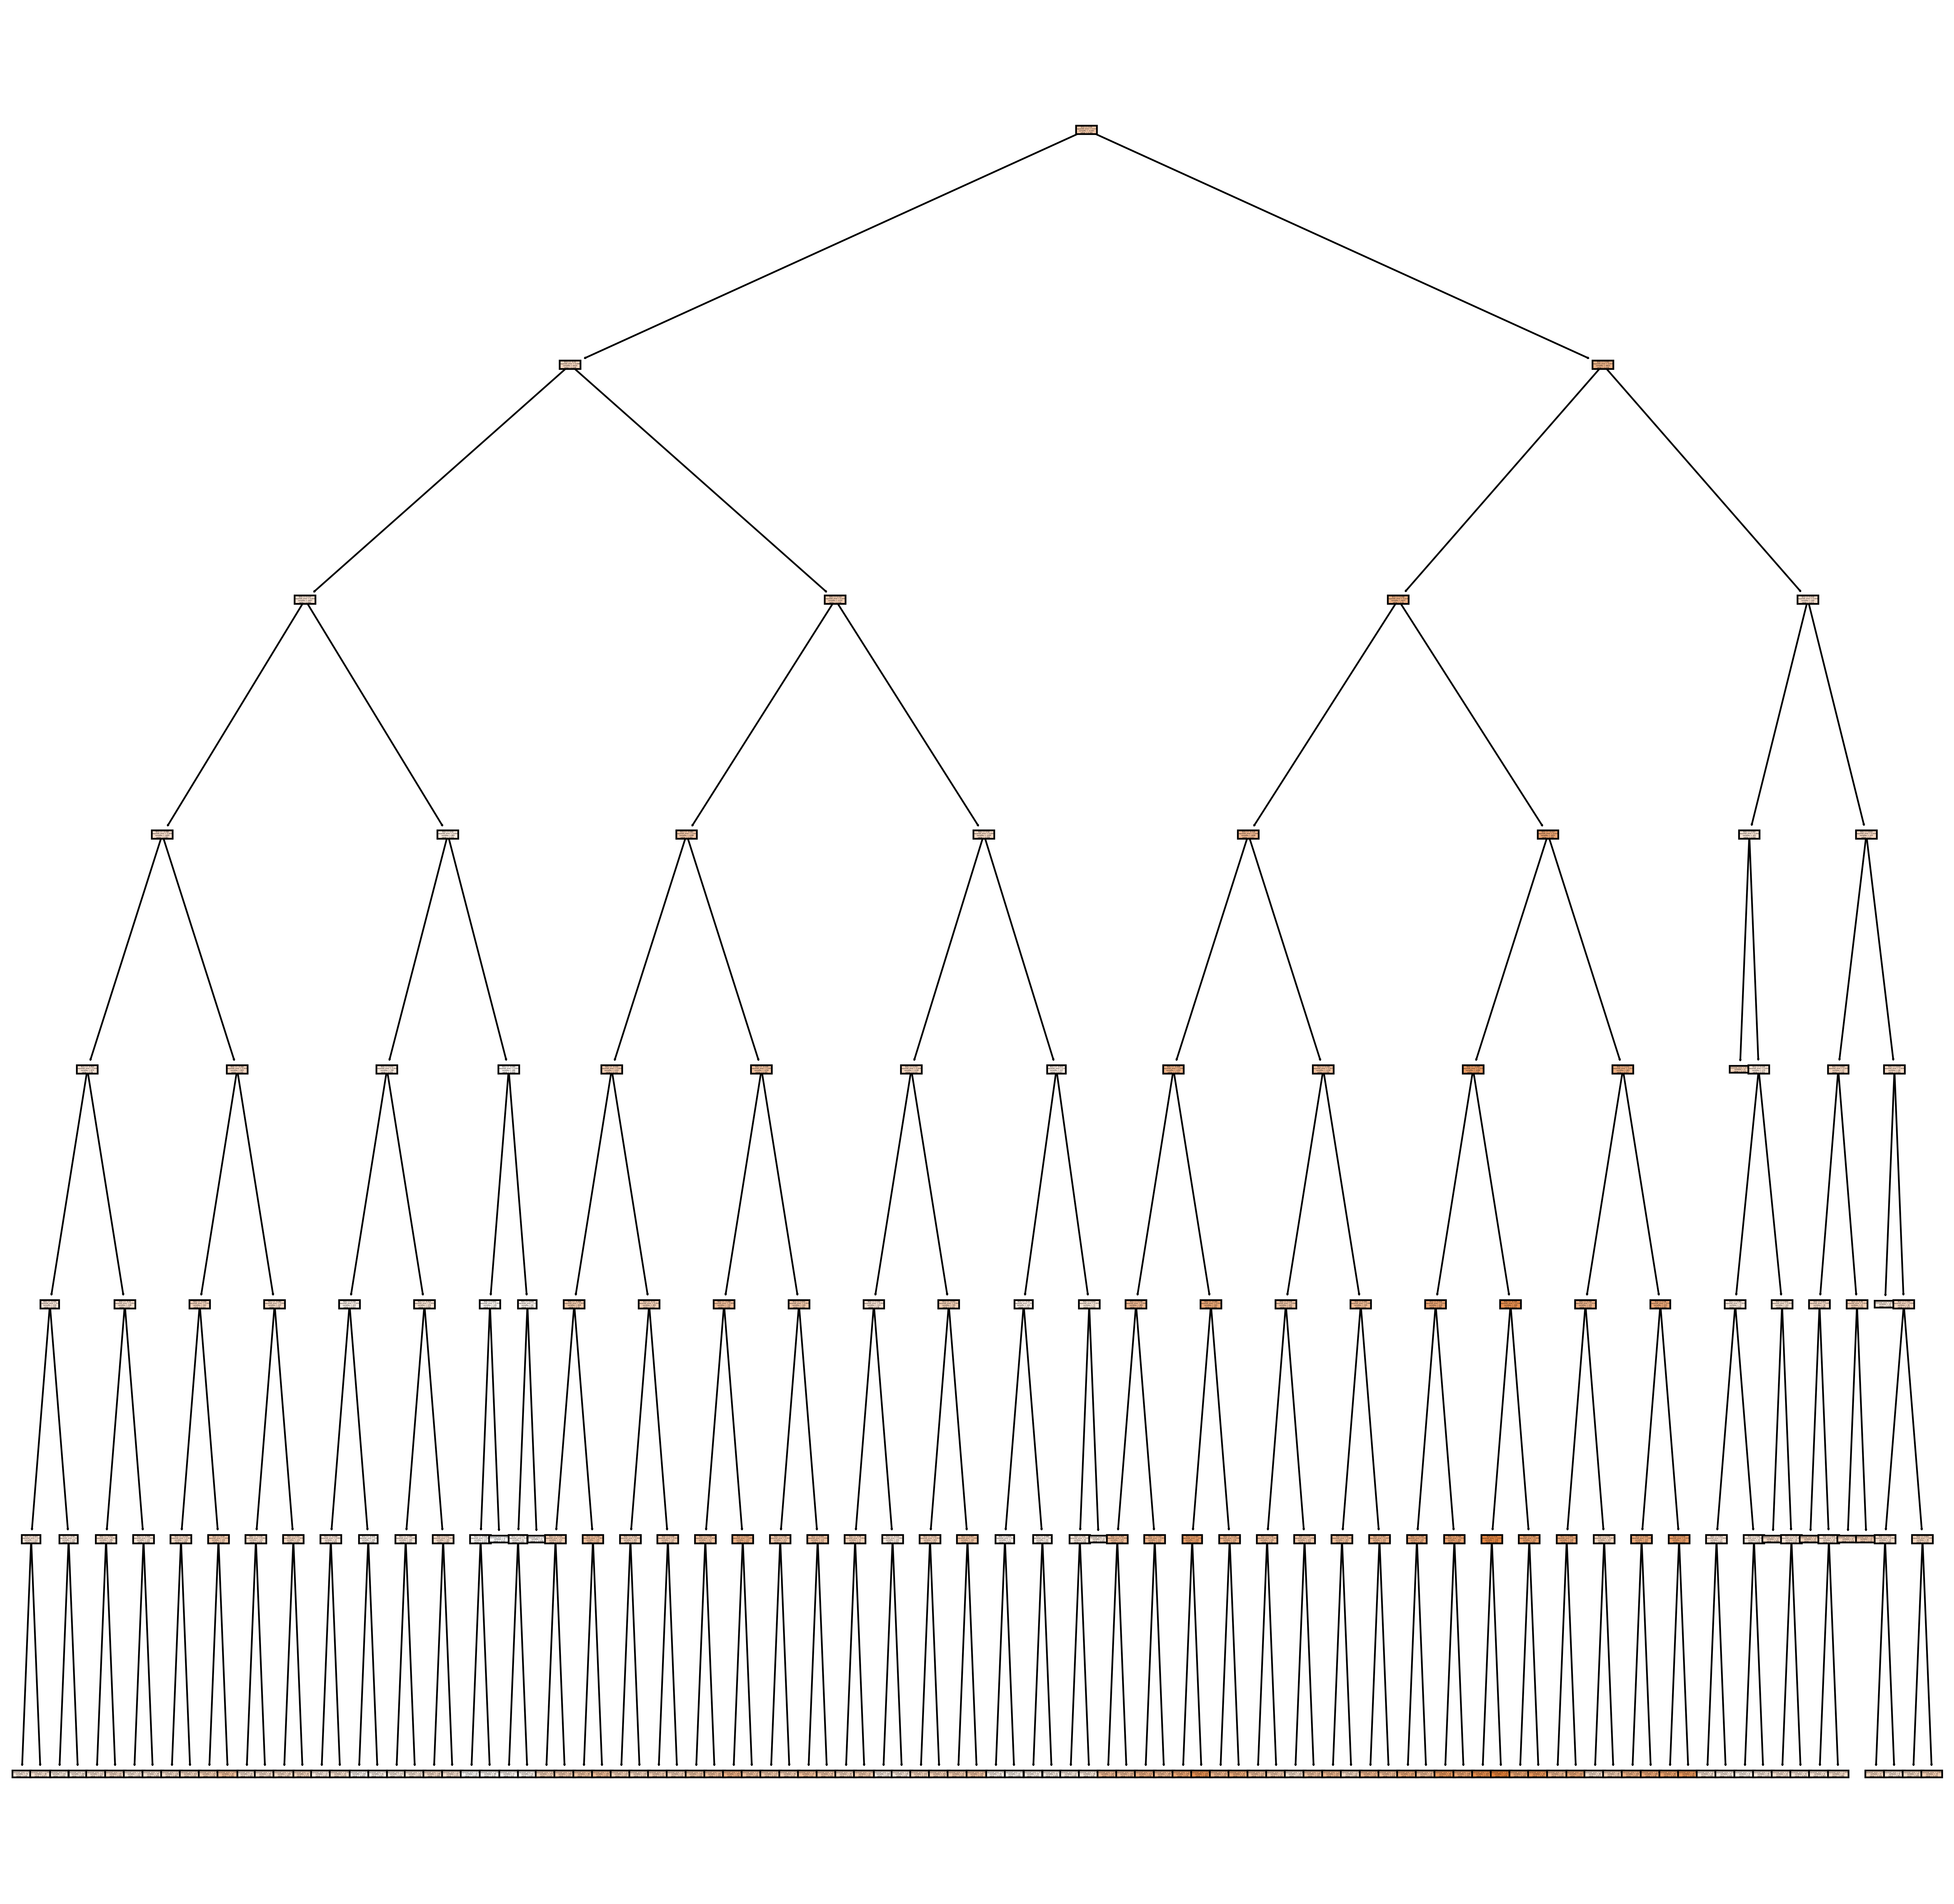

In [53]:
plt.figure(figsize=(20,20),dpi=400)
tree.plot_tree(model_2,filled=True)
plt.show()

### **<font color=brown ><b> Random Forest Regressor <b>**

**<font color=brown > Model Building**

In [54]:
model_3 = RandomForestRegressor(n_estimators=150).fit(x_train,y_train)

**<font color=brown > Coefficient of Determination for Train Data**

In [55]:
model_3_score=round(model_3.score(x_train,y_train),4)
print('Performance of Model on Train Data: ',model_3_score)

Performance of Model on Train Data:  0.9453


**<font color=brown > Coefficient of Determination for Test Data**

In [56]:
# Model Building
model_2_score_test = round(model_2.score(x_test,y_test),4)
print('Performance of Model on Test Data: ',model_2_score_test)

Performance of Model on Test Data:  0.6506


**<font color=brown > Predicting the Data**

In [57]:
pred_3 = model_2.predict(x_test)

**<font color=brown > Checking for ERRORS**

In [58]:
mse_3,rmse_3,mae_3,mape_3 = errors(pred_3)

print('Mean Squared Error: ',mse_3)
print('Root Mean Squared Error: ',rmse_3)
print('Mean Absolute Error: ',mae_3)
print('Mean Absolute Percentage Error: ',mape_3)

Mean Squared Error:  0.004941480127958438
Root Mean Squared Error:  0.07029566222718467
Mean Absolute Error:  0.04616228119230037
Mean Absolute Percentage Error:  42569613158.899124


**<font color=brown > Cross Validation**

In [59]:
cv_model_3 = RandomForestRegressor()

kf = KFold(n_splits=5,shuffle=True,random_state=55)

cv_model_3_r2 = cross_val_score(cv_model_3,x,y,cv=kf,n_jobs=-1,scoring='r2',error_score='raise').mean()
cv_model_3_mse = -cross_val_score(cv_model_3,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error',error_score='raise').mean()
cv_model_3_rmse = np.sqrt(-cross_val_score(cv_model_3,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error',error_score='raise').mean())
cv_model_3_mae = -cross_val_score(cv_model_3,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_absolute_error',error_score='raise').mean()
cv_model_3_mape = -cross_val_score(cv_model_3,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_absolute_percentage_error',error_score='raise').mean()

**<font color=brown > Visualization using Predicted and Actual Values**

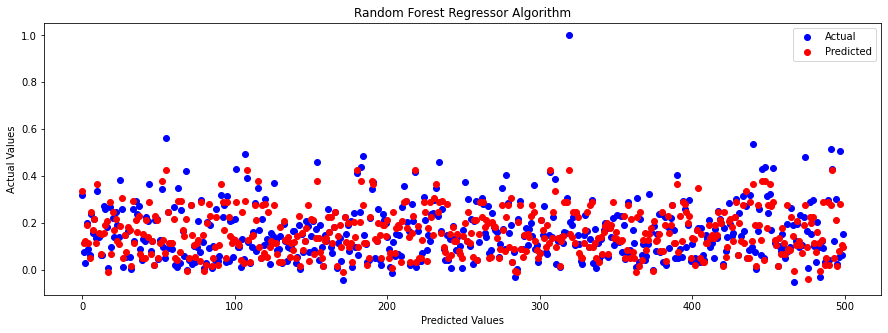

In [60]:
plt.figure(figsize=(15,5))
X = np.arange(0,len(y_test[:500]))
plt.scatter(X,y_test[:500],color='blue',label='Actual')
plt.scatter(X,pred_3[:500],color='red',label='Predicted')
plt.title('Random Forest Regressor Algorithm')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

* Performance of Model on Train Data and Test Data has large difference. So we can say that model got overfitted.

**<font color=brown > Creating DataFrame for Comparision**

In [61]:
dic_1 = {'Linear Regression':list(np.around(np.array([model_1_score,mse_1,rmse_1,mae_1,mape_1]), 3)),
'Decision Tree Regressor':list(np.around(np.array([model_2_score,mse_2,rmse_2,mae_2,mape_2]), 3)),
'Random Forest Regressor':list(np.around(np.array([model_3_score,mse_3,rmse_3,mae_3,mape_3]), 3))}

dic_2 = {'Linear Regression CV':list(np.around(np.array([cv_model_1_r2,cv_model_1_mse,cv_model_1_rmse,cv_model_1_mae,cv_model_1_mape]), 3)),
'Decision Tree Regressor CV':list(np.around(np.array([cv_model_2_r2,cv_model_2_mse,cv_model_2_rmse,cv_model_2_mae,cv_model_2_mape]), 3)),
'Random Forest Regressor CV':list(np.around(np.array([cv_model_3_r2,cv_model_3_mse,cv_model_3_rmse,cv_model_3_mae,cv_model_3_mape]), 3))}

Index = ['R2','MSE','RMSE','MSE','MAPE']
reg = pd.DataFrame(dic_1,index=Index)
cv = pd.DataFrame(dic_2,index=Index)

In [62]:
reg

,Linear Regression,Decision Tree Regressor,Random Forest Regressor
R2,5.250000e-01,6.760000e-01,9.450000e-01
MSE,7.000000e-03,5.000000e-03,5.000000e-03
RMSE,8.300000e-02,7.000000e-02,7.000000e-02
MSE,5.700000e-02,4.600000e-02,4.600000e-02
MAPE,6.208921e+10,4.256961e+10,4.256961e+10


In [63]:
cv

,Linear Regression CV,Decision Tree Regressor CV,Random Forest Regressor CV
R2,5.230000e-01,3.190000e-01,6.030000e-01
MSE,7.000000e-03,9.000000e-03,5.000000e-03
RMSE,8.100000e-02,9.600000e-02,7.400000e-02
MSE,5.700000e-02,6.400000e-02,5.000000e-02
MAPE,2.504111e+10,3.961828e+09,1.157879e+10


### **<font color=brown > Final Conclusion**

#### Based on the Errors and Performance of the Model :–
* Linear Regression and Decision Tree Regressor has both performance on Train and Test are closer so we can they are good models. But Random Forest Model has large difference in Performance so we can say that model got overfitted. 
* Linear Regression has high errors compared to the other models. In terms of performance, LR is the least.
* Decision Tree Regressor and Random Forest Regressor have similar Errors. Compared to the other models these two models have the least difference in error. In terms of performance, Decision Tree has the least and Random Forest has the highest of all.
* Finally we conclude that Decision Tree ALgorithm has best fit. So it was good model. 